# LPA Experiments

In [2]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from sklearn import metrics
import scipy.io as sio
import time 
from LPA import *

## Data Loading

In [3]:
bahoc_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/baseballhockey/baseballhockey_graph.mat")['W']
pcmac_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/pcmac/pcmac_graph.mat")['W']
wimac_W = sio.loadmat(file_name="./sample_graphs/20newsgroups/windowsmac/windowsmac_graph.mat")['W']
bahoc_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/baseballhockey/baseballhockey_Y.mat")['Y']
pcmac_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/pcmac/pcmac_Y.mat")['Y']
wimac_Y = sio.loadmat(file_name="./sample_graphs/20newsgroups/windowsmac/windowsmac_Y.mat")['Y']

In [4]:
bahoc_label = dict(zip(np.arange(bahoc_Y.shape[0]), bahoc_Y[:,0]))
pcmac_label = dict(zip(np.arange(pcmac_Y.shape[0]), pcmac_Y[:,0]))
wimac_label = dict(zip(np.arange(wimac_Y.shape[0]), wimac_Y[:,0]))

bahoc_G = nx.Graph(bahoc_W)
pcmac_G = nx.Graph(pcmac_W)
wimac_G = nx.Graph(wimac_W)

nx.set_node_attributes(G=bahoc_G, name='label', values=bahoc_label)
nx.set_node_attributes(G=pcmac_G, name='label', values=pcmac_label)
nx.set_node_attributes(G=wimac_G, name='label', values=wimac_label)

In [5]:
in_graphs = {'bahoc':bahoc_G,'pcmac':pcmac_G,'wimac':wimac_G}
in_trees = {key: nx.minimum_spanning_tree(in_graphs[key]) for key in in_graphs.keys()}

In [6]:
in_trees

{'bahoc': <networkx.classes.graph.Graph at 0x1a1358dba8>,
 'pcmac': <networkx.classes.graph.Graph at 0x1a1358dcc0>,
 'wimac': <networkx.classes.graph.Graph at 0x1a1358dd68>}

## Settings

In [7]:
DEFAULT_PARAMS = {
    'NUM_CLASSES': 2,
    'NUM_TRIALS': 10,
    'NUM_TRAIN': range(4, 100, 10)
}

In [53]:
def G_LPA(graphs):
    print("Running LPA...")
    thres = {}
    cmn = {}
    for key in graphs.keys():
        start = time.time()
        print(key)
        thres[key],cmn[key] = LPA(graphs[key], DEFAULT_PARAMS).demo()
        end = time.time()
        print('Time:',end-start)
    print("Finished!")
    return thres, cmn

In [54]:
def MST_LPA(trees):
    print("Running LPA on Minimal Spanning Tree...")
    thres = {}
    cmn = {}
    for key in trees.keys():
        start = time.time()
        print(key)
        thres[key],cmn[key] = LPA(trees[key], DEFAULT_PARAMS).demo()
        end = time.time()
        print('Time:',end-start)
    print("Finished!")
    return thres, cmn

In [ ]:
def RST(graph):
    tree_node = []
    tree_edge = []
    node_lsit = graph.nodes
    root = np.random.choice(node_lsit)
    for node in graph.neighbors(root):
        
    
    tree_node.append(root)
    tree_edge.
    

In [19]:
test_graph = in_graphs['pcmac']

In [66]:
test_graph.number_of_nodes()

1943

In [35]:
root = np.random.choice(test_graph.nodes)

In [67]:
asd = [(1,2),(3,10)]

{(1, 2), (3, 10)}

In [62]:
curr_node=root

In [87]:
np.random.random()

0.8608117797675178

In [198]:
def rst_spine(num_rst,graph,epsilon=0.2,weight=False):
    rst_list = []
    sp_list = []
    while len(set(rst_list)) < num_rst:
        print("Generating RST No.",len(set(rst_list))+1,"...")
        start = time.time()
        visited_nodes = []
        visited_edges = []
        rst_root = np.random.choice(graph.nodes)
        curr_node = rst_root
        visited_nodes.append(rst_root)
        while len(set(visited_nodes)) < graph.number_of_nodes():
            neighb_list = [node for node in graph.neighbors(curr_node)]
            if weight:                
                if len(set(visited_nodes)) > 0.9 * graph.number_of_nodes():
                    epsilon = 0.8
                weight_list = [graph.get_edge_data(curr_node,node)['weight'] for node in graph.neighbors(curr_node)]
                trans_prob = weight_list/sum(weight_list)
                if np.random.random() > epsilon:
                    next_node = np.random.choice(a=neighb_list,p=trans_prob)
                else:
                    next_node = np.random.choice(a=neighb_list)
                    
            else:
                next_node = np.random.choice(a=neighb_list)
            if next_node not in visited_nodes:
                visited_edges.append((curr_node,next_node))
            visited_nodes.append(next_node)
            curr_node = next_node
        rst = nx.Graph(visited_edges)
        print("Tree? :",nx.is_tree(tree))
        spine = [node for node in nx.dfs_preorder_nodes(rst,rst_root)]
        rst_list.append(rst)
        sp_list.append(spine)
        end = time.time()
        print("Time:",end-start,"\n")
        
    print("Finished!")
    return rst_list,sp_list

In [199]:
rst_list, sp_list = rst_spine(2,test_graph)

Generating RST No. 1 ...
Tree? : True
Time: 27.294022798538208 

Generating RST No. 2 ...
Tree? : True
Time: 41.03267979621887 

Finished!


In [197]:
def LPA_NN(graph,k):
    

1943

In [141]:
tree = nx.Graph(visited_edges)
print("Tree? :",nx.is_tree(tree))
spine = [node for node in nx.dfs_preorder_nodes(tree,root)]

True


In [181]:
for a in tree.neighbors(970):
    print(a)

308
31


In [180]:
[node for node in nx.dfs_preorder_nodes(tree,root)][3]

31

In [170]:
[node for node in nx.dfs_postorder_nodes(tree,root)]

[1458,
 858,
 166,
 444,
 945,
 720,
 1045,
 1281,
 1895,
 1227,
 1017,
 1471,
 1088,
 1433,
 1246,
 1510,
 1773,
 1854,
 997,
 1381,
 1146,
 1788,
 1242,
 1646,
 1052,
 1295,
 1258,
 1632,
 1482,
 1092,
 1591,
 1836,
 1335,
 1585,
 1244,
 1885,
 1331,
 1770,
 1542,
 1501,
 1000,
 1914,
 1001,
 1495,
 29,
 1887,
 1207,
 1863,
 1225,
 1264,
 1880,
 1604,
 1110,
 678,
 1612,
 1513,
 1469,
 1857,
 664,
 1270,
 1904,
 114,
 1250,
 1587,
 1009,
 1240,
 1358,
 1818,
 993,
 1926,
 1251,
 1617,
 1293,
 1843,
 1922,
 1842,
 748,
 382,
 476,
 1420,
 1328,
 1096,
 1099,
 1795,
 276,
 1180,
 261,
 1203,
 1241,
 716,
 1036,
 951,
 232,
 1876,
 242,
 535,
 469,
 641,
 489,
 291,
 87,
 74,
 890,
 508,
 198,
 921,
 948,
 171,
 425,
 1664,
 159,
 397,
 438,
 374,
 579,
 879,
 511,
 433,
 90,
 134,
 306,
 295,
 112,
 275,
 21,
 228,
 977,
 519,
 783,
 416,
 1602,
 1202,
 1677,
 832,
 128,
 539,
 969,
 1208,
 1678,
 1785,
 1105,
 1126,
 1272,
 1330,
 1368,
 1883,
 1683,
 1845,
 1630,
 1763,
 846,
 931,
 

In [146]:
a = nx.dfs_postorder_nodes(tree, root)

In [126]:
bbb = []
for b in nx.dfs_preorder_nodes(tree, root):
    bbb.append(b)

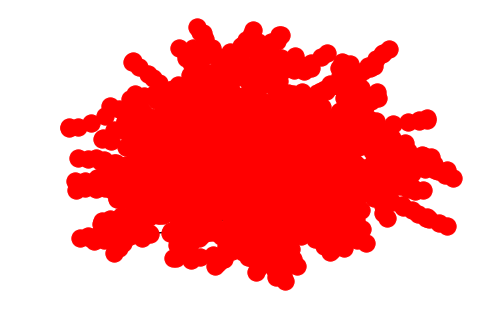

In [140]:
nx.draw(spine)
plt.draw()

In [127]:
len(bbb)

1943

In [128]:
ccc = []
for c in nx.dfs_edges(tree,root):
    ccc.append(c)

In [129]:
len(ccc)

1942

In [136]:
ccc[-2]

(156, 620)

In [137]:
bbb[-2]

620

In [98]:
import matplotlib.pyplot as plt

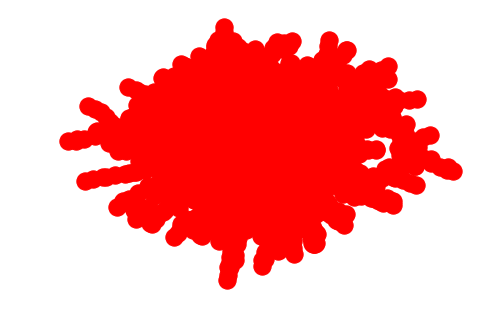

In [99]:
nx.draw(tree)
plt.draw()

In [94]:
len(set(visited_edges))

1942

In [ ]:
263 333 908 418

In [85]:
[node for node in test_graph.neighbors(418)]

[35, 83, 581, 908, 973, 1051, 1211, 1372, 1480, 1536, 1686, 1884]

In [84]:
[test_graph.get_edge_data(418,node) for node in test_graph.neighbors(418)]

[{'weight': 8.443797774111058e-14},
 {'weight': 3.3183641275020954e-14},
 {'weight': 5.0855242873730886e-14},
 {'weight': 2.520737442917057e-08},
 {'weight': 7.454732709737006e-14},
 {'weight': 5.880309079480777e-14},
 {'weight': 2.54041864972849e-14},
 {'weight': 6.670464354418697e-14},
 {'weight': 4.313447828837102e-14},
 {'weight': 8.284701548129786e-14},
 {'weight': 5.5552514662457004e-14},
 {'weight': 4.9756485175277304e-14}]

In [50]:
aaa

281

In [53]:
neighb_list

[2,
 31,
 61,
 156,
 208,
 241,
 242,
 281,
 353,
 419,
 447,
 501,
 509,
 535,
 539,
 641,
 970,
 1230,
 1282]

In [56]:
test_graph.get_edge_data(417,1282)

{'weight': 2.3565430567157603e-14}

In [42]:
weight_list/weight_sum

array([5.58840646e-08, 2.79709159e-07, 5.97599136e-07, 3.93663247e-07,
       5.79332099e-07, 4.93290762e-08, 1.29767500e-07, 9.99992595e-01,
       1.27985324e-06, 1.56985899e-07, 3.49768544e-07, 6.31123467e-08,
       1.97748789e-06, 3.10976814e-07, 5.25478982e-07, 2.91881289e-07,
       2.00787607e-07, 1.12819558e-07, 5.09398460e-08])

In [38]:
aaa = 0
for node in test_graph.neighbors(root):
    print(test_graph.get_edge_data(root,node)['weight'])
#     weight_sum += curr_weight
aaa

2.5852689936262068e-14
1.2939706871223361e-13
2.764570771093008e-13
1.82113701506707e-13
2.680065102116258e-13
2.2820267649887242e-14
6.003212126687441e-14
4.626094874102907e-07
5.920766338654949e-13
7.26237040796527e-14
1.618074451569672e-13
2.919658658472878e-14
9.14811434332418e-13
1.4386189002298537e-13
2.43093362842707e-13
1.3502805325338018e-13
9.288693983652714e-14
5.2191784469500606e-14
2.3565430567157603e-14


0

In [31]:
for a in test_graph.neighbors(root):
    print(a)

632
1007
1065
1120
1222
1264
1266
1320
1459
1601
1666
1744
1790


In [81]:
nx.get_edge_attributes(in_graphs['bahoc'],'weight')

{(0, 137): 4.983909103028168e-13,
 (0, 308): 2.1736150918794732e-10,
 (0, 352): 6.686533809876269e-14,
 (0, 381): 1.915740508935017e-13,
 (0, 480): 9.450432888333465e-09,
 (0, 668): 5.1148819729096796e-14,
 (0, 670): 2.276827985888706e-07,
 (0, 809): 2.5889243593886907e-13,
 (0, 814): 1.7231854106265482e-11,
 (0, 868): 7.927281885502715e-14,
 (1, 41): 5.072121092112301e-14,
 (1, 140): 4.995003393517512e-14,
 (1, 228): 1.2195245907939138e-13,
 (1, 459): 8.322954756750465e-10,
 (1, 602): 7.964437649150489e-12,
 (1, 677): 1.0608204637155116e-13,
 (1, 720): 1.9910640342325816e-10,
 (1, 763): 2.05266174989862e-09,
 (1, 878): 6.59890525141906e-14,
 (1, 948): 1.1016659465393723e-13,
 (2, 47): 1.614823350471195e-13,
 (2, 200): 2.1058124371365995e-13,
 (2, 309): 1.0573429694286993e-13,
 (2, 322): 3.6672381087962765e-14,
 (2, 417): 3.937192007059171e-12,
 (2, 455): 1.8411147340677974e-13,
 (2, 581): 1.5291395415892678e-13,
 (2, 607): 2.0645317883814776e-13,
 (2, 734): 2.025909657261914e-14,
 (2,

In [73]:
np.random.choice(list(in_graphs['bahoc'].nodes))

1582

## Runs

In [48]:
G_thres, G_cmn = G_LPA(graphs=in_graphs)

Running LPA...
bahoc
Time: 40.61310291290283
pcmac
Time: 36.94490098953247
wimac
Time: 35.948227882385254
Finished!


In [55]:
MST_thres, MST_cmn = MST_LPA(trees=in_trees)

Running LPA on Minimal Spanning Tree...
bahoc
Time: 37.593116998672485
pcmac
Time: 42.07006788253784
wimac
Time: 43.05665302276611
Finished!
